In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('spam_or_not_spam.csv')

# Preprocessing

**Missing Value & WhiteSpace**

In [4]:
# Drop the rows with missing values
df = df.dropna()

blanks = []

for i,email,label in df.itertuples():  # iterate over the DataFrame
    if email.isspace():         # test 'email' for whitespace
        blanks.append(i)     # add matching index numbers to the list
print(len(blanks),"   |    ", 'blanks: ', blanks , )

df.drop(blanks, inplace=True)

2    |     blanks:  [2806, 2828]


**Cleaning with NLTK**

In [5]:
# Import the 'stopwords' corpus from the nltk library
# Stop words are commonly used words that are often removed from text during processing to enhance algorithm performance
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Import the 'WordNetLemmatizer' from the nltk library
# Lemmatization is the process of reducing a word to its base or root form (lemma)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Get the list of English stop words
sw = stopwords.words('english')

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hossein\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hossein\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# Define a function to preprocess text
def preprocess_text(messy_string):
    # Assert that the input is a string
    assert(type(messy_string) == str)

    # Split the string into words, lemmatize each word, remove stop words, and join the words back into a string
    # 'lemmatizer.lemmatize(word)' reduces the word to its base or root form (lemma)
    # 'word not in sw' filters out stop words
    cleaned = ' '.join([lemmatizer.lemmatize(word) for word in messy_string.split() if word not in sw])

    # Return the cleaned string
    return cleaned

In [7]:
df['email'] = df['email'].apply(preprocess_text)


# Processing

**Making Value**

In [8]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Define the pipeline with a more descriptive name
text_processing_pipeline = Pipeline([
    ('Vectorize', CountVectorizer()),
    ('TF-IDF', TfidfTransformer())
])

In [9]:
text_processing_pipeline

Pipeline(steps=[('Vectorize', CountVectorizer()),
                ('TF-IDF', TfidfTransformer())])

**Split Data**

In [10]:
# Import 'train_test_split' from sklearn's model_selection module
# This is used to split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# Split 'df["email"]' and 'df["label"]' into training and testing sets
# 'test_size=0.2' means that 20% of the data will be used for testing, and the rest for training
# 'random_state=42' sets the seed for the random number generator used for the split
X_train, X_test, y_train, y_test = train_test_split(df["email"], df["label"], test_size=0.2, random_state=42)

In [11]:
# Fit the text processing pipeline to the training data and transform the training data
# 'fit_transform()' learns the parameters from the data and then transforms the data according to these parameters
X_train = text_processing_pipeline.fit_transform(X_train)

# Transform the testing data using the already fitted pipeline
# 'transform()' uses the parameters learned from 'fit_transform()' to transform the data
X_test = text_processing_pipeline.transform(X_test)

# Training Models

In [12]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , confusion_matrix

Classification report for SVC: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       497
           1       0.99      0.97      0.98       103

    accuracy                           0.99       600
   macro avg       0.99      0.98      0.99       600
weighted avg       0.99      0.99      0.99       600



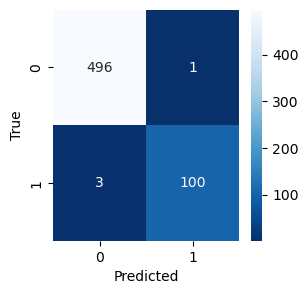

--------------------------------------------
Classification report for RandomForest: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       497
           1       1.00      0.93      0.96       103

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



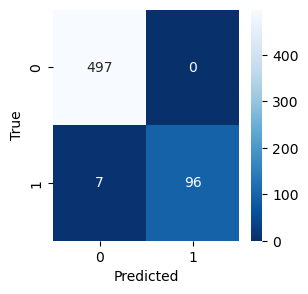

--------------------------------------------
Classification report for LogisticRegression: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       497
           1       1.00      0.83      0.91       103

    accuracy                           0.97       600
   macro avg       0.98      0.92      0.95       600
weighted avg       0.97      0.97      0.97       600



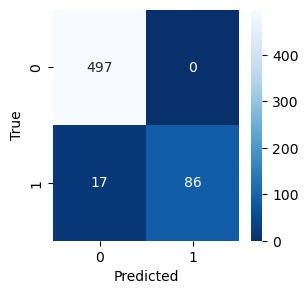

--------------------------------------------
Classification report for MultinomialNB: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       497
           1       1.00      0.42      0.59       103

    accuracy                           0.90       600
   macro avg       0.95      0.71      0.77       600
weighted avg       0.91      0.90      0.88       600



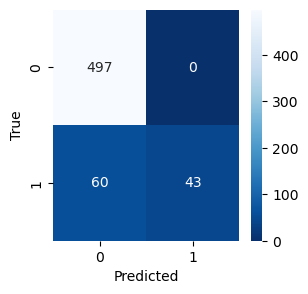

--------------------------------------------


In [13]:
# Define a dictionary of classifiers for easier referencing and potential scalability
classifiers = {
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "MultinomialNB": MultinomialNB()
}

# Iterate over each classifier and print report
for classifier_name, classifier_obj in classifiers.items():
    # Fit the model
    classifier_obj.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier_obj.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print(f'Classification report for {classifier_name}: ')
    print(report)
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix using matplotlib and seaborn
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'Blues_r')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("--------------------------------------------")

# Test

In [14]:
df.iloc[2600]

email    hyperlink publish like professional digital pu...
label                                                    1
Name: 2600, dtype: object

In [15]:
# Test the model with a custom email

#custom_email = "Hi there, How are you doing?"
custom_email = df.iloc[2600]['email']


custom_email = text_processing_pipeline.transform([preprocess_text(custom_email)])

print(classifiers["SVC"].predict(custom_email))

[1]
